# 05. MCMC (Markov chain Monte Carlo)
- 마르코프 체인 몬테카를로(MCMC) 방법은 목적 분포를 직접 샘플링하는 대신, 정상분포 (Stationary distribution)로 수렴하는 마르코프 체인을 개발하는 것이 목표

<br>

## 05-01. 마르코프 체인
- 마르코프 체인은 마르코프 속성을 만족하는, 이산적 시간 확률 가정 $\theta_1, \theta_2, \dots, \theta_t, \dots$의 연속

$$p(\theta_t | \theta_1, \dots, \theta_{t-1}) = p(\theta_t | \theta_{t-1}) \quad \forall t.$$

- 모든 $\theta_t$ 변수들의 가능한 값들은 체인의 상태라고 명명하며, 가능한 상태의 공간은 유한하거나, 셀 수 없이 무한하거나, 연속적일 수 도 있음

- **마르코프 체인은 실질적으로 기억 (Memory)의 성질이 없음**
    
    $\rightarrow$ **미래에 영향을 미치는 과거에 대한 모든 지식은 현재 상태에 포함되어 있음**
    
    $\rightarrow$ **마르코프 속성 (Markov Property)**
    
- 마르코프 속성에 의하여, 마르코프 체인은 초기 분포 $p(\theta_1)$와, 전환 커널 $T(\theta_{t-1}, \theta_t) = p(\theta_t | \theta_{t-1})$에 의해 정의

<br>

## 05-02. 마르코프 체인 수렴 이론
- MCMC의 경우 정상 분포로 수렴하는 마르코프 체인에 초점을 맞춰야 하며, 이것이 목표분포여야 함

<br>

#### 마르코프 체인의 수렴과 관련된 정의
* **마르코프 체인은 모든 상태에서, 양의 확률로 다른 상태로 도달할 수 있다면, 환원 불가능 (irreducible)**
    * 환원 불가능성의 부족 : 클래스 간에 이동할 수 었는 상태가 2개 이상이 체인에 존재
    
    $\rightarrow$ 체인의 수렴을 방해
    
<br>

- **만약 상태 $\theta$로 돌아가기 위한 단계의 수가 $k$ ($k \geq 2$)로 나누어 떨어지면, 마르코프 체인의 상태 $\theta$는 $k$만큼의 주기성을 가짐**
    
    **마르코프 체인은 어떤 상태도 주기 $k\geq2$에 대해 주기적이지 않으면 비주기성을 가짐 (aperiodic)**

<br>

- **비주기적이고 환원 불가능한 마르코프 체인은, 모든 상태로의 기대 복귀 시간이 유한할 때 에르고딕(ergodic)**
    - **에르고딕 : 확률 변수의 장기적인 평균이 무조건부 평균과 같아지는 성질**
        - 마르코프 체인의 중요한 속성
        - 체인이 본질적으로 정상적으로 동작하고, 방해없이 상태 공간을 이동할 수 있음을 보장

<br>

- **마르코프 체인은 $p(\theta_{t+1}, \dots, \theta_{t+k})$이 $t$에 의존하지 않을 때 정상성 (stationary)을 가짐**

<br>

- **마르코프 체인은 $(\theta_t, \theta_{t+1})$이 모든 $t$에 대해 교환 가능할 때, 가역적 (reversible)**
    - **가역 마르코프 체인은 항상 정상성을 가짐**

<br>

- **전환 커널 $T$를 가지는 마르코프 체인은 분포 $\pi(\theta)$가 존재하는 경우, 세부 균형 조건 (detailed  balance condition) 을 만족**

$$\pi(\theta) T(\theta, \theta') = \pi(\theta') T(\theta', \theta) \quad \forall \theta, \theta'.$$

- 세부 균형 조건을 만족하는 마르코프 체인은 가역적

<br>

#### 가역적이고, 에르고딕한 마르코프 체인은 고유한 정상 분포를 가짐

<br>

## 05-03. Metropolis-Hastings 알고리즘
- Metropolis-Hastings (MH) 샘플링은, 정상분포가 목표인 마르코프 체인 $\theta^{(1)}, \theta^{(2)}, \dots$을 유도하며 작동
* 알고리즘은 제안분포 밀도함수 $q(\theta' ; \theta^{(t)})$로 부터, 새로운 상태  $\theta '$를 도출하며 작동
- 제안된 값은 아래의 값에 의해 수용 여부가 결정

$$\begin{equation}
  a = \frac{\pi(\theta')}{\pi(\theta^{(t)})} \frac{q(\theta^{(t)} ; \theta')}{q(\theta' ; \theta^{(t)})}
\end{equation}$$

- $a \geq1$이면, 새로운 상태는 항상 수용되며, 그렇지 않다면 $a$의 확률로 수용여부를 결정

<br>

- MH 업데이트는 세부적인 균형을 충족하고 체인은 따라서 가역적. 
- 제안이 적절하게 선택되면 체인도 에르고딕
- 에르고딕성의 충분 조건은 모든 $n \geq n_0$에 대해, 다른 상태로부터 $n$단계로 도달할 수 있는 유한한 $n_0$이 존재한다는 것 

<br>

- 제안분포 밀도함수 $q$가 대칭 $q(\theta^{(t)} ; \theta') = q(\theta' ; \theta^{(t)})$인 경우는 MH 알고리즘의 특수한 경우
    
    이는 제안이 현재 값을 중심으로 하는 고정된 대칭 분포를 따르는 경우 발생
    
$$q(\theta' ; \theta) = \mathcal{N}(\theta';\; \theta, \sigma^2).$$

- 이 경우 수용확률은 다음과 같이 간소화

$$a = \frac{\pi(\theta')}{\pi(\theta^{(t)})}.$$

$\rightarrow$ 이러한 특수한 경우가 Metropolis 알고리즘

<br>

- MH 샘플링에서는 타겟 확률 밀도의 비율 $\frac{\pi(\theta')}{\pi(\theta^{(t)})}$만이 필요하며, 
    
    **이는 알려지지 않았지만 고정된 정규화 상수 $Z$를 갖는 비정규화된 밀도함수 $\pi^*(\theta) = Z \cdot \pi(\theta)$를 사용하여 동일한 결과를 얻을 수 있음을 의미**



<br>

### 01. Metropolis-Hastings 알고리즘 구현
- MH 알고리즘을 구현하려면 수치적 안정성을 위해 원시 밀도 값 대신 로그 밀도를 사용하는 것이 더 좋음
- 수용 확률의 로그를 취하면 

$$\log a = \log \pi(\theta') - \log \pi(\theta^{(t)})
  + \log q(\theta^{(t)} ; \theta') - \log q(\theta' ; \theta^{(t)}),$$
  
- $q$가 대칭인 Metropolis의 경우

$$\log a = \log \pi(\theta') - \log \pi(\theta^{(t)}).$$

<br>

- 제안값은 $a$의 확률로 수용 여부가 결정되기에

    $\rightarrow$ 이는 균일 난수 $u \sim \mathrm{Uniform}(0, 1)$를 추출하고, $u<a$인지 확인하는 방식으로 구현
    
    - $a>1$이라면 제안값을 항상 수용. ($a > 1 \Rightarrow u < a.$)
    - 로그함수는 단조 증가 함수이므로, 수용확률에 대해 로그를 취하여, 수용 규칙을 도출

$$\log u < \log \pi(\theta') - \log \pi(\theta^{(t)})
  + \log q(\theta^{(t)} ; \theta') - \log q(\theta' ; \theta^{(t)}),$$

where $u \sim \mathrm{Uniform}(0, 1)$

(만약 $q$가 대칭이라면, $\log q(\theta^{(t)} ; \theta') - \log q(\theta' ; \theta^{(t)}) = 0,$이기에, 상수화를 통하여 코드 간소화 가능)

<br>

- **MCMC는 초기 상태에 따라 달라지며, 초기 상태에서 샘플의 종속성을 제거하기 위해 샘플의 전반부를 Warm-up 샘플로 버리는 것이 일반적 (Burn-In)**

<br>

#### Metropolis 샘플링 예제

In [21]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

- 타겟함수 : $\pi^*(\theta) = (-|\theta|)$

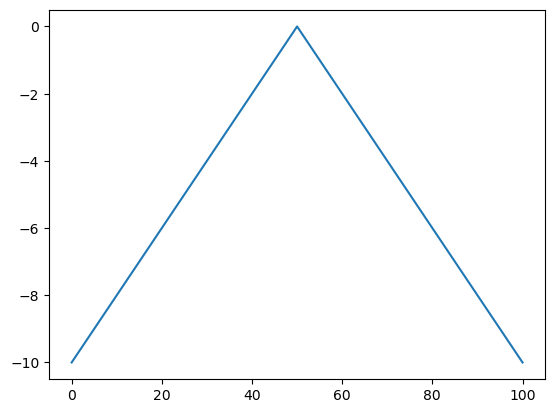

In [22]:
target = lambda theta: -np.abs(theta)
plt.plot(target(np.linspace(-10, 10, 101)))
plt.show()

<br>

- 제안분포 밀도함수 : $\theta + N(0,\sigma^2)$

In [30]:
f = lambda theta: theta+npr.normal()

- `theta0` : 초기값
- `n` : 생성할 샘플 수
- `logtarget` : 로그 타겟 함수
- `drawproposal` : 제안분포. 제안값 생성하는 함수

$$\log u < \log \pi(\theta') - \log \pi(\theta^{(t)})$$

In [31]:
def mhsample0(theta0, n, logtarget, drawproposal):
    """초기값"""
    theta = theta0
    thetas = np.zeros(n)
    
    for i in range(n):    
        """새로운 제안값"""
        theta_prop = drawproposal(theta)
        
        """수용여부 결정"""
        if np.log(npr.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            
        thetas[i] = theta
        
    return thetas

In [32]:
npr.seed(42)
theta = mhsample0(theta0=0.0, n=10000, logtarget=target, drawproposal=f)

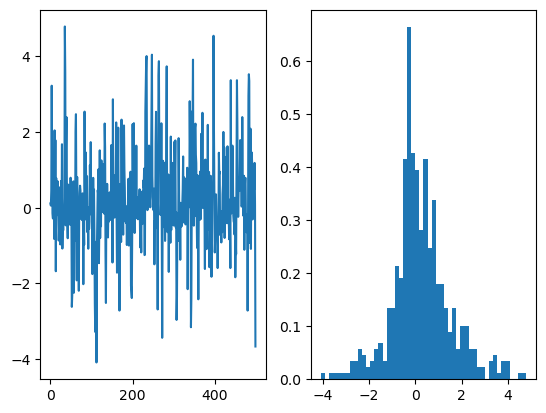

In [33]:
theta = theta[len(theta)//2:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(theta[::10])
h = ax[1].hist(theta[::10], 50, density=True)
plt.show()

<br>

## 05-04. MCMC 샘플링 효율성
- MCMC 샘플의 효율성은 제안분포 밀도함수 $q(\theta' ; \theta)$에 의존
- 위의 예제의 제안분포 $\theta$ + $N(0, \sigma^2)$에서 $\sigma^2$를 증가시켜가며 수용률을 변동을 확인

<br>

#### 제안분포 밀도함수 : $\theta + 0.1\cdot N(0,\sigma^2)$

In [38]:
f2 = lambda theta: theta+0.1*npr.normal()

In [41]:
def mhsample1(theta0, n, logtarget, drawproposal):
    theta = theta0
    thetas = np.zeros(n)
    accepts = 0
    
    for i in range(n):
        theta_prop = drawproposal(theta)
        if np.log(npr.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            accepts += 1
            
        thetas[i] = theta
        
    print("Sampler acceptance rate:", accepts/n)
    return thetas

In [42]:
theta = mhsample1(theta0=0.0, n=10000,  logtarget=target, drawproposal=f2)

Sampler acceptance rate: 0.9666


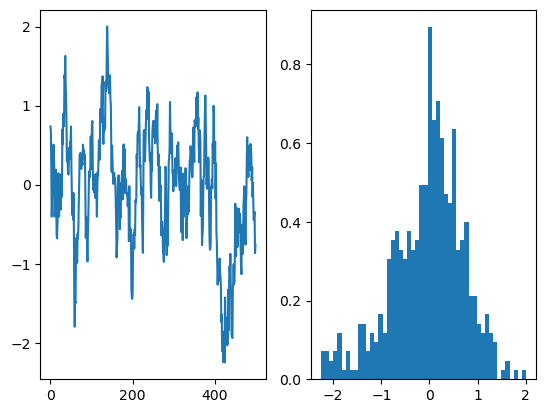

In [43]:
theta = theta[len(theta)//2:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(theta[::10])
h = ax[1].hist(theta[::10], 50, density=True)
plt.show()

<br>

#### 제안분포 밀도함수 : $\theta + 2.5\cdot N(0,\cdot\sigma^2)$

In [44]:
f3 = lambda theta: theta+2.5*npr.normal()

In [45]:
theta = mhsample1(0.0, 10000, target, f3)

Sampler acceptance rate: 0.4586


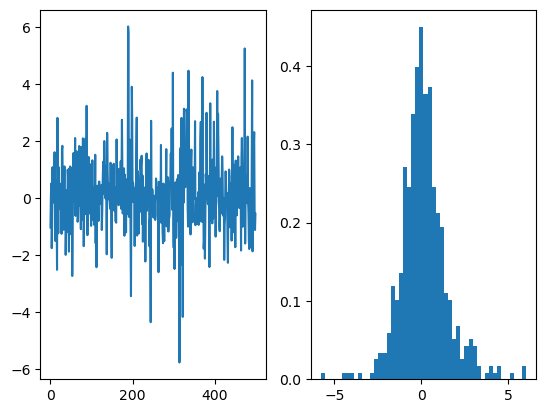

In [46]:
theta = theta[len(theta)//2:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(theta[::10])
h = ax[1].hist(theta[::10], 50, density=True)
plt.show()

<br>

#### 제안분포 밀도함수 : $\theta + 50\cdot N(0,\sigma^2)$

In [47]:
f4 = lambda theta: theta+50*npr.normal()

In [48]:
theta = mhsample1(0.0, 10000, target, f4)

Sampler acceptance rate: 0.0309


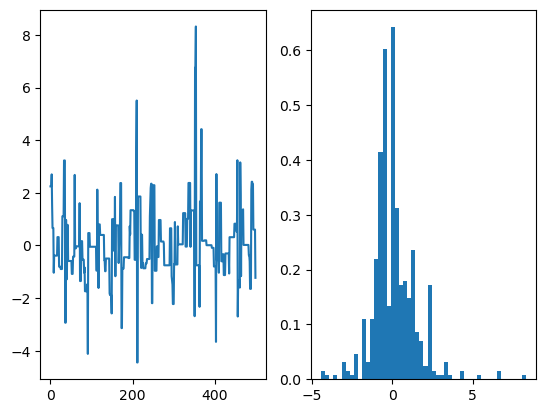

In [49]:
theta = theta[len(theta)//2:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(theta[::10])
h = ax[1].hist(theta[::10], 50, density=True)
plt.show()

<br>

- 너무 좁은 제안분포는 높은 수용률로 이어지지만, 샘플이 심각하게 편향 될 수있음
- 제안분포가 너무 넓으면 수용률이 매우 낮고, 동일 상태의 연속을 초래할 수 있으며, 이는 샘플의 히스토그램에서 스파이크(spike)로 나타남
    
    (스파이크 : 동일한 상태의 연속적인 시퀀스)
    
    이러한 스파이크는 샘플링에 따라 이러한 문제는 모두 해결되겠지만 제안분포가 잘못 선택되면, 문제가 해결되기 까지 오랜 시간이 걸릴 수 있음

<br>

- 제안값의 높은 수용 비율은 너무 짧은 step을 의미하고, 낮은 수용 비율은 너무 긴 step을 의미.

<br>

## 05-05. Metropolis-Hastings 알고리즘의 수렴
-   제안 분포(proposal distribution)가 다음 조건을 만족한다고 할 때, 이는 MH알고리즘에 의해 정의된 마르코프 체인의 에르고딕성을 보장
    
> 어떤 상태 $θ′$가 타겟 분포 $π$에 의해 $(π(θ′) > 0)$을 가진다면, 
>
> 임의의 다른 상태로부터 적어도 $n_0$단계 이상의 모든 $n$ 단계에서 $θ′$에 도달할 수 있다."

<br>

- 제안 분포 $q(θ′; θ)$와 타겟 분포 $π(θ)$에 대한 Metropolis–Hastings 수용 확률은
전이 커널 $T(θ, θ′) = f(θ′ | θ) · q(θ′; θ)$를 갖는 마르코프 체인을 정의
    
    $\rightarrow$ 이 체인은 자세 균형 조건(detailed balance condition)을 만족

$$f(\theta' | \theta) = \min\left(1, \frac{\pi(\theta') q(\theta ; \theta')}
{\pi(\theta) q(\theta' ; \theta)} \right),$$

*Proof*
$$\begin{align*}
    \pi(\theta) T(\theta, \theta') &= f(\theta' | \theta) \pi(\theta) q(\theta' ; \theta) \\
	  &= \min(\pi(\theta) q(\theta' ; \theta), \pi(\theta') q(\theta ; \theta')) \\
      &= \min(\pi(\theta') q(\theta ; \theta'), \pi(\theta) q(\theta' ; \theta)) \\
      &= f(\theta | \theta') \pi(\theta') q(\theta ; \theta') = \pi(\theta') T(\theta', \theta)
\end{align*}$$

- 위 이론의 관점에서는, 제안 분포가 일정한 단계 수 이후에 임의의 전이를 허용하기만 하면 충분
- 이는 일반적으로 정규분포와 같은 전형적인 제안 분포에서는 만족되지만, 
    
    대표값들이 강하게 분리된 극단적인 경우에는 유한 정밀도의 산술 연산 때문에 문제가 발생할 수 있음

<br>

### 01. MCMC수렴에 대한 유의사항
- 위의 이론은 제안 분포가 적절하다면, Metropolis–Hastings 알고리즘에 의해 정의된 마르코프 체인이 결국 대상 분포로부터 샘플을 생성하도록 수렴할 것임을 보여줌
    
    - **단, 이는 점근적 보장(asymptotic guarantee)이라는 점에 유의**
    
    
- 사실상 합리적인 제안 분포라면 점근적 수렴은 보장되지만, 수렴 속도는 사용된 구체적인 제안 분포에 크게 의존
    
    $\rightarrow$ **따라서 문제에 맞게 제안 분포를 조정(tune)하는 것이 매우 중요**

- MCMC 수렴 이론은 전이 커널(transition kernel)이 과거 샘플에 의존하지 않는다고 가정
    
    - 그러나 제안 분포를 조정하거나 적응형 종료 기준(adaptive termination criteria)을 사용하는 경우 이러한 가정이 깨질 수 있음
    
    이러한 문제를 피할 수 있는 적응형 샘플러(adaptive samplers)도 있지만, 이들은 더 복잡하고 널리 사용되지는 않음
    
    - 보통은 조정(튜닝) 단계에서 생성된 샘플은 모두 버리는 것이 최선의 선택

<br>

* **일반적으로 마르코프 체인이 수렴했음을 증명하는 것은 불가능**
    
    $\rightarrow$ **즉, 현재 탐색 중인 것이 단지 국소적 대표값(local mode)에 갇힌 상태인지 아닌지를 알 수 없기 때문**

#### **MCMC는 근본적으로 근사 추론(approximate inference) 방법으로 취급**

<br>

### 02. 몬테카를로 기대치의 수렴

- 샘플링으로 얻은 기대치 

$$\frac{1}{N}\sum_{i=1}^N h(\theta_i)$$는 정상 분포 $𝜋$에 따른 해당 기대값 $E_{\pi}(h(\theta))$
로 거의 확실하게 수렴합니다. 즉, $$\lim\limits_{N \rightarrow \infty} \frac{1}{N} \sum_{i=1}^N h(\theta_i) \rightarrow \operatorname{E}_\pi[h(\theta)] = \int h(\theta) \pi(\theta) \,\mathrm{d} \theta,$$단, $$\int |h(\theta)| \pi(\theta) \,\mathrm{d} \theta < \infty.$$인 경우에만 해당

- 수렴 속도는 중심극한정리에 의해 결정
    - 이는 $\mathcal{O}(1/\sqrt{n})$의 수렴속도를 의미
    - 이는 정확도를 두 배로 높이려면 샘플 수를 4배로 늘려야 함을 의미

$$\sqrt{N} \left( \frac{1}{N} \sum_{i=1}^N h(\theta_i) - \operatorname{E}_\pi[h(\theta)] \right)
\overset{d}{\rightarrow} \mathcal{N}(0, \sigma_h^2).$$